In [2]:
import pandas as pd

df = pd.read_csv(r"B:\PBCS\Internships\Future Interns ML\Task1\data\superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
monthly_sales = df.resample(
    'M', on='Order Date'
)['Sales'].sum().reset_index()

monthly_sales.columns = ['ds', 'y']
monthly_sales.head()


,ds,y
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


In [6]:
monthly_sales['month'] = monthly_sales['ds'].dt.month
monthly_sales['year'] = monthly_sales['ds'].dt.year

In [7]:
monthly_sales[['ds', 'month', 'year']].head()


,ds,month,year
0,2014-01-31,1,2014
1,2014-02-28,2,2014
2,2014-03-31,3,2014
3,2014-04-30,4,2014
4,2014-05-31,5,2014


In [8]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(monthly_sales)


12:00:05 - cmdstanpy - INFO - Chain [1] start processing
12:00:08 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
49,2018-02-28,35661.189752,26646.379822,45017.099474
50,2018-03-31,71959.641682,62890.471995,81550.056265
51,2018-04-30,55942.164467,46917.960612,65441.493184
52,2018-05-31,56193.016116,47545.547735,65670.810401
53,2018-06-30,57387.967884,47740.740388,66864.973240


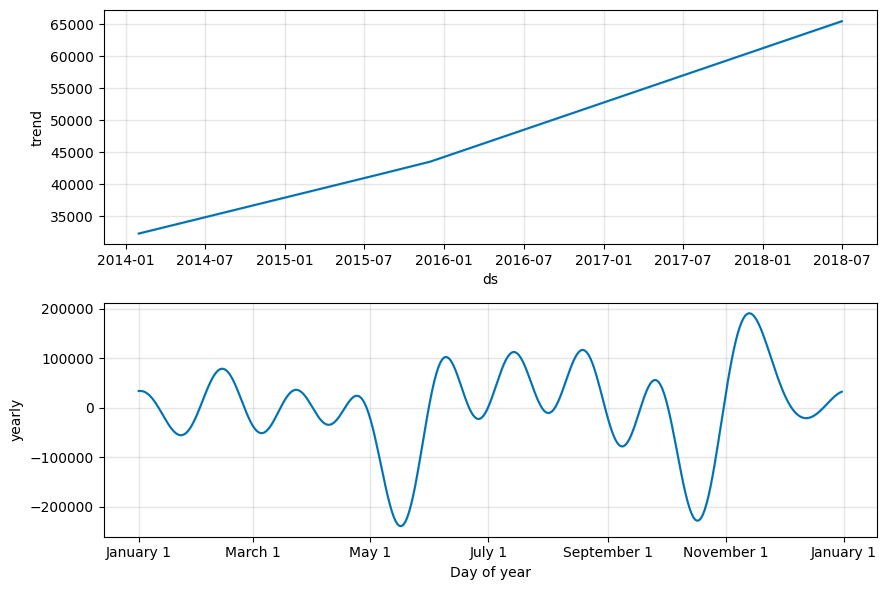

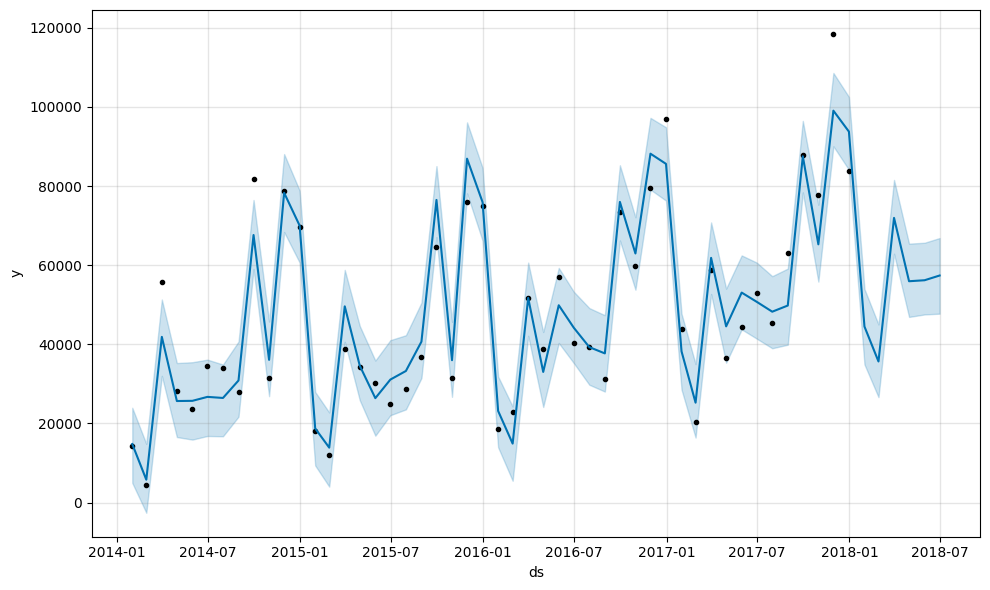

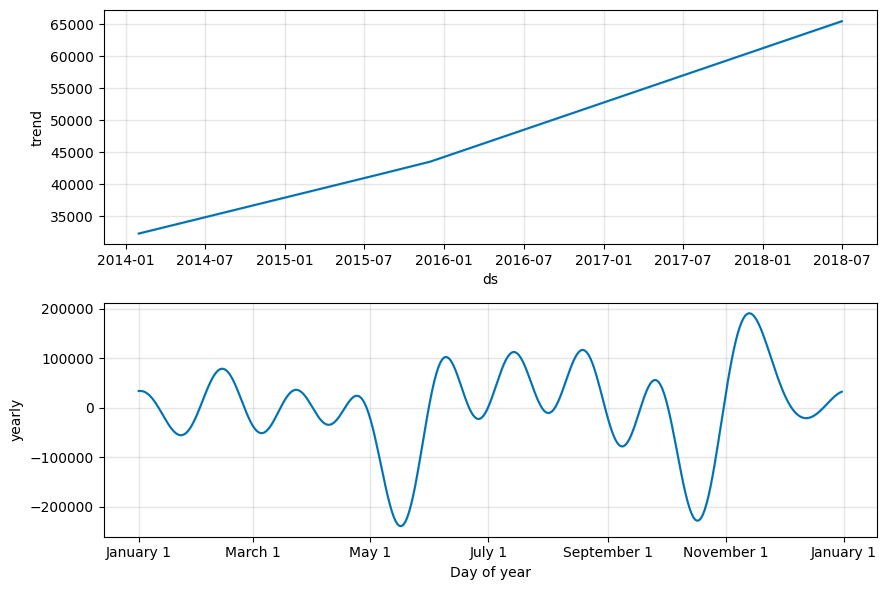

In [10]:
model.plot(forecast)
model.plot_components(forecast)

In [11]:
forecast_output = forecast[['ds', 'yhat']]
forecast_output.to_csv("sales_forecast.csv", index=False)